In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [2]:
np.random.seed(0)

t:  [   0    1    2 ... 1497 1498 1499]


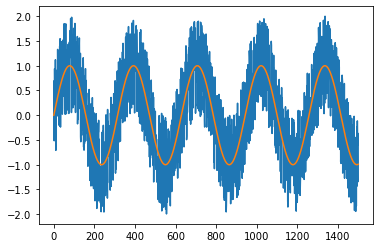

In [8]:
t = np.arange(0, 1500)
print('t: ', t)

#create sin data and add noise
x = np.sin(0.02*t) + np.random.uniform(low=-1, high=1, size=(1500,))
plt.plot(x)

x_without_noise = np.sin(0.02*t)
plt.plot(x_without_noise)

# 1. Create dataset

In [14]:
#normalizing data
normalizer = MinMaxScaler(feature_range=(0,1))
x = (np.reshape(x, (-1, 1)))
x = normalizer.fit_transform(x)

print(x)

[[0.47268718]
 [0.67307756]
 [0.37005021]
 ...
 [0.16176822]
 [0.40761572]
 [0.35008223]]


In [15]:
# creating dataset
train = x[0:1000]
test = x[1000:]
print(train.shape)

(1000, 1)


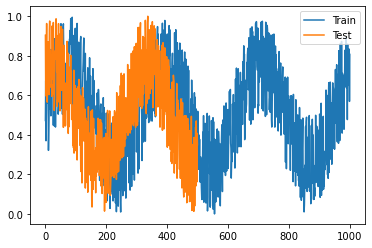

In [21]:
plt.plot(train)
plt.plot(test)
plt.legend(['Train', 'Test'])

In [44]:
def createDataSet(data, step):
    X, Y =[], []
    for i in range(len(data)-step):
        X.append(data[i:i+step])
        Y.append(data[i+step])
    return np.array(X), np.array(Y)

step = 10
trainX, trainY = createDataSet(train, step)
testX, testY = createDataSet(test, step)

print('trainX[0]:\n', trainX[0])
print('\ntrainY[0]: ', trainY[0])

trainX[0]:
 [[0.47268718]
 [0.67307756]
 [0.37005021]
 [0.51131047]
 [0.73446025]
 [0.6080536 ]
 [0.67855826]
 [0.5598003 ]
 [0.7798011 ]
 [0.58854793]]

trainY[0]:  [0.32149275]


# 3. Create Model

In [45]:
model = Sequential() #initialization of sequqntial model
model.add(SimpleRNN(units=1, activation='tanh')) #layer
model.add(Dense(1)) #output layer
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [46]:
history = model.fit(trainX, trainY, epochs=200, batch_size=16, verbose=2)

Epoch 1/200
62/62 - 0s - loss: 0.0446
Epoch 2/200
62/62 - 0s - loss: 0.0401
Epoch 3/200
62/62 - 0s - loss: 0.0360
Epoch 4/200
62/62 - 0s - loss: 0.0332
Epoch 5/200
62/62 - 0s - loss: 0.0317
Epoch 6/200
62/62 - 0s - loss: 0.0310
Epoch 7/200
62/62 - 0s - loss: 0.0305
Epoch 8/200
62/62 - 0s - loss: 0.0302
Epoch 9/200
62/62 - 0s - loss: 0.0299
Epoch 10/200
62/62 - 0s - loss: 0.0297
Epoch 11/200
62/62 - 0s - loss: 0.0295
Epoch 12/200
62/62 - 0s - loss: 0.0294
Epoch 13/200
62/62 - 0s - loss: 0.0291
Epoch 14/200
62/62 - 0s - loss: 0.0290
Epoch 15/200
62/62 - 0s - loss: 0.0289
Epoch 16/200
62/62 - 0s - loss: 0.0288
Epoch 17/200
62/62 - 0s - loss: 0.0286
Epoch 18/200
62/62 - 0s - loss: 0.0285
Epoch 19/200
62/62 - 0s - loss: 0.0284
Epoch 20/200
62/62 - 0s - loss: 0.0283
Epoch 21/200
62/62 - 0s - loss: 0.0282
Epoch 22/200
62/62 - 0s - loss: 0.0281
Epoch 23/200
62/62 - 0s - loss: 0.0280
Epoch 24/200
62/62 - 0s - loss: 0.0279
Epoch 25/200
62/62 - 0s - loss: 0.0279
Epoch 26/200
62/62 - 0s - loss: 0.

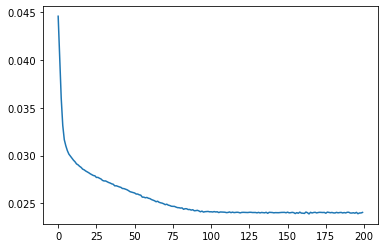

In [47]:
loss = history.history['loss']
plt.plot(loss)

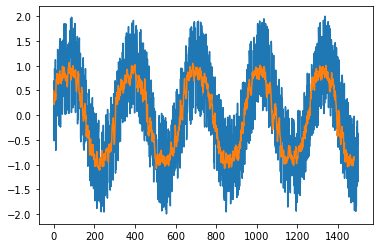

In [48]:
trainPredict = normalizer.inverse_transform(model.predict(trainX)) # inverse normal the predicted value to original
testPredict = normalizer.inverse_transform(model.predict(testX))

predicted = np.concatenate((trainPredict, testPredict))
x = normalizer.inverse_transform(x)

plt.plot(x)
plt.plot(predicted)